# Sellers Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [2]:
# Plot distribution of numerical variables in sellers dataset

from olist.seller import Seller
seller = Seller()
sellers = seller.get_training_data()
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits,revenue,profits_before_it_costs
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000,218.70,341.870,201.870,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,15.0,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,2290.307,2050.307,2370.307,2130.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,1.0,0.000000,1.000000,5.00,0,1,1,1.000,158.00,15.800,15.800,95.800,95.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,1.0,0.000000,1.000000,5.00,0,1,1,1.000,79.99,7.999,7.999,87.999,87.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.0,1.000000,0.000000,1.00,100,1,1,1.000,167.99,16.799,-83.201,96.799,-3.201


In [3]:
sellers.describe()

,delay_to_carrier,wait_time,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits,revenue,profits_before_it_costs
count,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000
mean,0.402786,12.160414,6.619192,0.124570,0.592130,4.086880,562.131313,33.617508,38.085185,1.162150,4566.515906,938.213880,376.082567,986.186944,424.055631
std,2.391687,7.103208,5.914010,0.191870,0.279057,0.810166,1941.000427,107.133714,122.417269,0.443348,14185.211617,1660.107616,1276.183916,1655.679175,1274.295160
min,0.000000,1.214178,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,6.500000,0.650000,-22499.517000,80.650000,-22419.517000
25%,0.000000,8.289263,1.000000,0.000000,0.478261,3.818424,0.000000,2.000000,3.000000,1.000000,239.800000,119.946750,19.892500,173.099250,93.000000
50%,0.000000,11.120969,4.000000,0.063856,0.600000,4.200000,100.000000,7.000000,8.000000,1.000000,893.500000,460.221000,250.859500,504.049000,285.790500
75%,0.000000,14.240673,10.000000,0.166667,0.750000,4.625000,380.000000,23.000000,26.000000,1.152009,3586.022500,1183.160250,676.667750,1223.955000,720.593750
max,45.434039,189.863160,23.000000,1.000000,1.000000,5.000000,40890.000000,1854.000000,2039.000000,15.000000,229472.630000,24387.263000,17967.605000,24387.263000,17967.605000


In [4]:
sellers.describe().columns

Index(['delay_to_carrier', 'wait_time', 'months_on_olist',
       'share_of_one_stars', 'share_of_five_stars', 'review_score',
       'cost_of_reviews', 'n_orders', 'quantity', 'quantity_per_order',
       'sales', 'revenues', 'profits', 'revenue', 'profits_before_it_costs'],
      dtype='object')

In [6]:

# plt.figure(figsize=(15,11))


# #select columns that are numerical variables for plotting distribution
# numerical_features = ['delay_to_carrier', 'wait_time', 'months_on_olist',
#        'share_of_one_stars', 'share_of_five_stars', 'review_score',
#        'cost_of_reviews', 'n_orders', 'quantity', 'quantity_per_order',
#        'sales', 'revenues', 'profits', 'revenue', 'profits_before_it_costs']


# for (i, col) in enumerate(numerical_features):
#     plt.subplot(3,5,i+1)
#     sns.histplot(sellers[col], kde=False, stat='density', discrete=True)
 
    

# Plots - Distribution

In [7]:
# delay_to_carrier: number of days beyond deadline (if any) carrier receives shipment from seller. This would represent
# any delay in the customer's order that can be attributable to the seller

# wait_time: the entire time from customer purchase to customer receipt of order. Since wait_time includes the time
# a seller ships to the carrier, it is correlated with delay_to_carrier. 


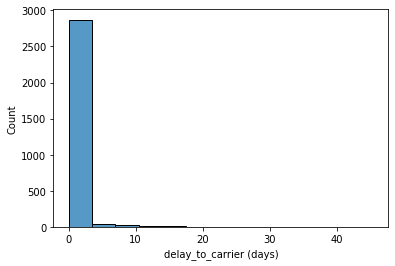

In [40]:
# delay_to_carrier.histogram
sns.histplot(sellers['delay_to_carrier'])
plt.xlabel('delay_to_carrier (days)')

                     

In [33]:
#How many sellers contribute to delays?
num_sellers_delay = len((sellers[sellers['delay_to_carrier'] > 0]))
num_sellers_delay

243

In [32]:
#What percentage of sellers contribute to delays?
round(num_sellers_delay / len(sellers), 2) * 100

8.0

In [35]:
# What is the average review score for sellers that have delayed shipment to carriers?
sellers[sellers['delay_to_carrier'] > 0].review_score.mean()


3.3051861527612707

In [36]:
#How does that compare to the review score of all sellers? 
sellers.review_score.mean()

4.086880345061921

With sellers who have had delayed shipment to carriers, there is a 0.78 (4.09 - 3.31) decrease in avg. review score. Let's keep 'delay_to_carrier' as a feature to include in OLS Regression since it appears to have an impact on customer reviews.

In [ ]:
# wait_time.histogram

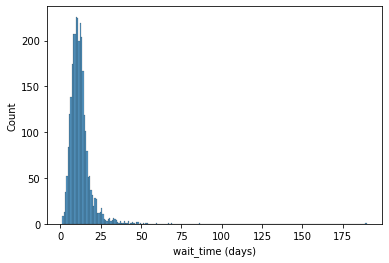

In [44]:
sns.histplot(sellers.wait_time)
plt.xlabel('wait_time (days)');

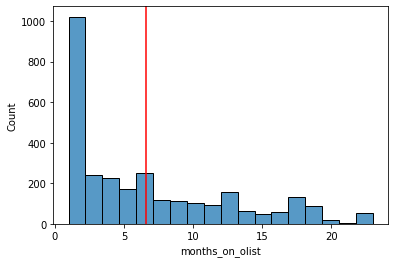

In [50]:
# months_on_olist: how long the seller has been on the platform
sns.histplot(sellers.months_on_olist)
plt.axvline(x=sellers.months_on_olist.mean(), color='red');


Appears to be many new sellers on Olist platform. Include 'months_on_olist' as feature in OLS regression to see impact 
on customer reviews

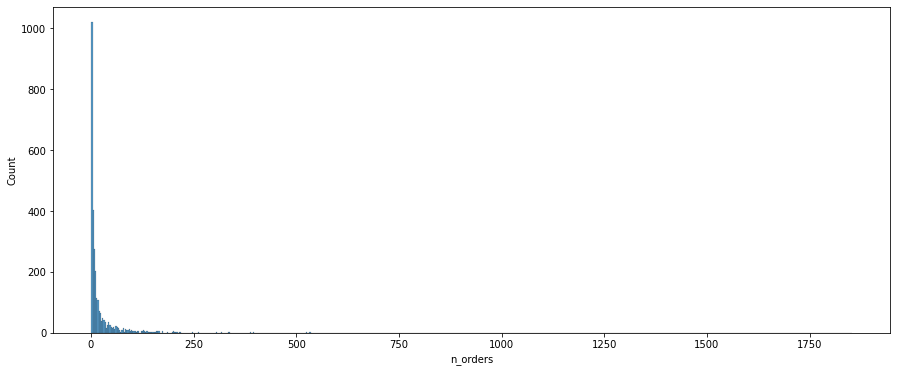

In [62]:
# 'n_orders': number of orders the seller has had on the platform
plt.figure(figsize=(15, 6))
sns.histplot(sellers.n_orders);


Here we can see a large right skewed distribution of orders transacted by sellers. In fact the median 'n_order' is 7, and 75% of the sellers have had less than 23 orders on the platform. 

/Users/atat/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


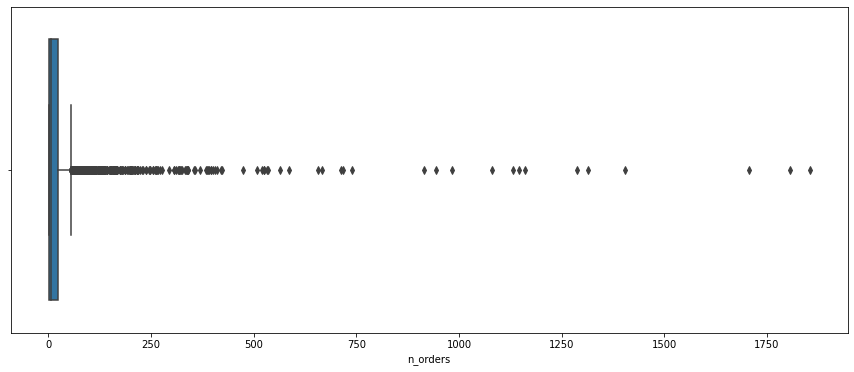

In [66]:
plt.figure(figsize=(15,6))
sns.boxplot(sellers.n_orders);

# Model out review_score with OLS

In [ ]:
def standardize(df, features):
    df_standardized = df.copy()
    for f in features:
        mu = df[f].mean()
        sigma = df[f].std()
        df_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
    return df_standardized


In [ ]:
# Decide which features to analyze impact on review_score
features = ['delay_to_carrier', 'wait_time', 'n_orders', 'quantity', 'quantity_per_order', 'sales']
sellers_standardized = standardize(sellers, features)
model = smf.ols(formula=f"review_score ~ {'+ '.join(features)}", data=sellers_standardized).fit()

In [ ]:
model.params

In [ ]:
model.params[1:].sort_values().plot(kind='barh');

In [ ]:
model.rsquared

In [ ]:
sns.histplot(sellers['review_score'], kde=True, stat='density', discrete=True)
sns.histplot(model.predict(sellers_standardized[features]), kde=True, stat='density', discrete=True);


In [ ]:
sns.histplot(model.resid, kde=True, stat='density', discrete=True);